In [1]:
# SETUP

# Libraries
from google.cloud import bigquery
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# client location
client = bigquery.Client(location = "europe-north1")
print("Client creating using default project: {}".format(client.project))

Client creating using default project: gentle-pier-291608


In [2]:
# HDD models
query = """
    SELECT model, COUNT(serial_number) AS N_instances
    FROM df.all_data
    GROUP BY model
"""
query_job = client.query(query, location= "europe-north1")  # API request - starts the query

models = query_job.to_dataframe()

In [3]:
models = models.sort_values(by = ["N_instances"], ascending=False)
models = models.reset_index(drop=True)
models.head()

,model,N_instances
0,ST4000DM000,64738824
1,ST12000NM0007,29713310
2,HGST HMS5C4040BLE640,24360983
3,ST8000NM0055,17103691
4,HGST HMS5C4040ALE640,15186521


In [4]:
print("Total number of different models:",len(models.model.unique()))

Total number of different models: 123


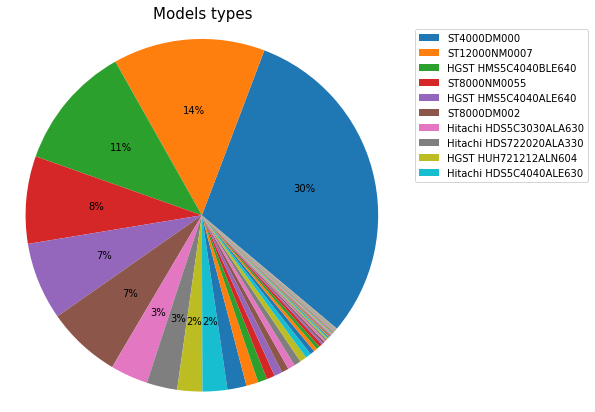

In [5]:
sizes = models["N_instances"]
labels = models["model"]

fig1, ax = plt.subplots(figsize=(7,7))

def autopct_more_than_1(pct):
    return ('%1.f%%' % pct) if pct > 2 else ''

p,t,a = ax.pie(sizes.values, autopct=autopct_more_than_1, colors=mcolors.TABLEAU_COLORS, startangle=-40)
ax.axis('equal') 

# create handles and labels for legend, take only those where value is > 1
normsizes = sizes/sizes.sum()*100
h,l = zip(*[(h,lab) for h,lab,i in zip(p,labels,normsizes) if i > 2])

ax.legend(h,l,loc="best", bbox_to_anchor=(1.5,1))
plt.title('Models types', fontsize=15)

plt.show()

In [6]:
top3models = models["model"][0:3].values
for element in top3models:
    print(element)

ST4000DM000
ST12000NM0007
HGST HMS5C4040BLE640
